In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import requests

In [2]:
# #BLOQUE METODO PARA OBTENER CANTIDAD DE DESCARGAS

# # Función para obtener la cantidad de descargas de un juego por su ID
# def obtener_cantidad_descargas(app_id):
#     url = f"https://api.steampowered.com/ISteamUserStats/GetNumberOfCurrentPlayers/v1/?appid={app_id}"
#     try:
#         respuesta = requests.get(url)
#         respuesta.raise_for_status()
#         data = respuesta.json()
#         if 'response' in data and 'player_count' in data['response']:
#             return data['response']['player_count']
#         else:
#             return "Cantidad de descargas no disponible"
#     except requests.exceptions.RequestException as e:
#         print(f"Error al obtener la cantidad de descargas para el juego con ID {app_id}: {e}")
#         return "Error"

# # DataFrame con los IDs de los juegos
# df = pd.read_csv("D:/s4nti/Documents/OCTAVO SEMESTRE/PROYECTO INTEGRADOR DE TECNOLOGÍAS DE BIG DATA/PROYECTO/proyecto-big-data/app/Pruebas/AllGames.csv")

# # Aplicar la función a cada ID del juego en el DataFrame y agregar los resultados como una nueva columna
# df['Cantidad de descargas'] = df['ID del juego'].apply(obtener_cantidad_descargas)

# # Imprimir el DataFrame resultante
# print(df)


Error al obtener la cantidad de descargas para el juego con ID 2075730: 404 Client Error: Not Found for url: https://api.steampowered.com/ISteamUserStats/GetNumberOfCurrentPlayers/v1/?appid=2075730
Error al obtener la cantidad de descargas para el juego con ID 584210: 404 Client Error: Not Found for url: https://api.steampowered.com/ISteamUserStats/GetNumberOfCurrentPlayers/v1/?appid=584210
Error al obtener la cantidad de descargas para el juego con ID 256410: 404 Client Error: Not Found for url: https://api.steampowered.com/ISteamUserStats/GetNumberOfCurrentPlayers/v1/?appid=256410
Error al obtener la cantidad de descargas para el juego con ID 1271140: 404 Client Error: Not Found for url: https://api.steampowered.com/ISteamUserStats/GetNumberOfCurrentPlayers/v1/?appid=1271140
Error al obtener la cantidad de descargas para el juego con ID 243870: 404 Client Error: Not Found for url: https://api.steampowered.com/ISteamUserStats/GetNumberOfCurrentPlayers/v1/?appid=243870
Error al obtener

In [2]:
# DataFrame con los IDs de los juegos
df = pd.read_csv("D:/s4nti/Documents/OCTAVO SEMESTRE/PROYECTO INTEGRADOR DE TECNOLOGÍAS DE BIG DATA/PROYECTO/proyecto-big-data/app/Pruebas/AllGames.csv")


In [3]:
df.head()


,ID del juego,Repeticiones
0,461640,1
1,730,1
2,578080,1
3,570,1
4,42690,1


In [4]:
# DataFrame con los IDs de los juegos
df = pd.read_csv("D:/s4nti/Documents/OCTAVO SEMESTRE/PROYECTO INTEGRADOR DE TECNOLOGÍAS DE BIG DATA/PROYECTO/proyecto-big-data/app/Archivos basura\ArchivoFinalP4.csv")
df.head()

,Unnamed: 0,ID del juego,Géneros,Categorías,Fecha de Lanzamiento,Fecha,Dias_Pasados,Multiplayer,Cantidad de descargas,Precio
0,0,461640,"Action, Adventure, Indie, RPG","Single-player, Steam Achievements, Full contro...",NaN,-1,2457,0.0,1,55.0
1,1,730,"Action, Free to Play","Multi-player, Cross-Platform Multiplayer, Stea...",NaN,-1,2457,1.0,708661,0.0
2,2,578080,"Action, Adventure, Massively Multiplayer, Free...","Multi-player, PvP, Online PvP, Stats, Remote P...",NaN,-1,2457,1.0,166412,0.0
3,3,570,"Action, Strategy, Free to Play","Multi-player, Co-op, Steam Trading Cards, Stea...",NaN,-1,2457,1.0,272098,0.0
4,4,42690,NaN,NaN,NaN,-1,2457,NaN,49,3999.0


In [5]:
games = df['ID del juego']
genre = df['Géneros']
date = df['Dias_Pasados']
downloads = df['Cantidad de descargas']
price = df['Precio']
multiplayer = df['Multiplayer']

In [6]:
downloads = pd.to_numeric(downloads, errors='coerce')

In [7]:
downloadsMean = downloads.mean()
downloads.fillna(downloadsMean, inplace=True)

In [8]:
# Llenamos los nan de la variable de precio con la media del precio
priceMean = price.mean()
price.fillna(priceMean, inplace=True)

In [9]:
multiplayer.dropna()

0       0.0
1       1.0
2       1.0
3       1.0
5       1.0
       ... 
4549    0.0
4550    1.0
4551    1.0
4552    0.0
4553    0.0
Name: Multiplayer, Length: 4333, dtype: float64

In [10]:
dat = pd.DataFrame({
    'game_id': games,
    'genero': genre,
    'descargas': downloads,
    'tiempo_en_mercado': date,
    'precio': price,
    'multiplayer': multiplayer
})

dat

,game_id,genero,descargas,tiempo_en_mercado,precio,multiplayer
0,461640,"Action, Adventure, Indie, RPG",1.0,2457,55.0,0.0
1,730,"Action, Free to Play",708661.0,2457,0.0,1.0
2,578080,"Action, Adventure, Massively Multiplayer, Free...",166412.0,2457,0.0,1.0
3,570,"Action, Strategy, Free to Play",272098.0,2457,0.0,1.0
4,42690,NaN,49.0,2457,3999.0,NaN
...,...,...,...,...,...,...
4549,777130,"Casual, Indie, Simulation, Free to Play",503.0,1442,0.0,0.0
4550,784950,"Free to Play, Indie, Massively Multiplayer, St...",409.0,2211,0.0,1.0
4551,790600,"Free to Play, Indie, Strategy",15.0,2150,0.0,1.0
4552,793350,"Action, Casual, Indie",1.0,2214,299.0,0.0


In [11]:
dat.dropna(subset=['multiplayer'], inplace=True)

In [12]:
dat

,game_id,genero,descargas,tiempo_en_mercado,precio,multiplayer
0,461640,"Action, Adventure, Indie, RPG",1.0,2457,55.0,0.0
1,730,"Action, Free to Play",708661.0,2457,0.0,1.0
2,578080,"Action, Adventure, Massively Multiplayer, Free...",166412.0,2457,0.0,1.0
3,570,"Action, Strategy, Free to Play",272098.0,2457,0.0,1.0
5,235600,"Action, Adventure",34.0,2457,2999.0,1.0
...,...,...,...,...,...,...
4549,777130,"Casual, Indie, Simulation, Free to Play",503.0,1442,0.0,0.0
4550,784950,"Free to Play, Indie, Massively Multiplayer, St...",409.0,2211,0.0,1.0
4551,790600,"Free to Play, Indie, Strategy",15.0,2150,0.0,1.0
4552,793350,"Action, Casual, Indie",1.0,2214,299.0,0.0


In [13]:
dat.dropna(subset=['genero'], inplace=True)

In [14]:
dat

,game_id,genero,descargas,tiempo_en_mercado,precio,multiplayer
0,461640,"Action, Adventure, Indie, RPG",1.0,2457,55.0,0.0
1,730,"Action, Free to Play",708661.0,2457,0.0,1.0
2,578080,"Action, Adventure, Massively Multiplayer, Free...",166412.0,2457,0.0,1.0
3,570,"Action, Strategy, Free to Play",272098.0,2457,0.0,1.0
5,235600,"Action, Adventure",34.0,2457,2999.0,1.0
...,...,...,...,...,...,...
4549,777130,"Casual, Indie, Simulation, Free to Play",503.0,1442,0.0,0.0
4550,784950,"Free to Play, Indie, Massively Multiplayer, St...",409.0,2211,0.0,1.0
4551,790600,"Free to Play, Indie, Strategy",15.0,2150,0.0,1.0
4552,793350,"Action, Casual, Indie",1.0,2214,299.0,0.0


In [15]:
dat.to_csv('test_game_genre.csv', index=False) #Guardamos la data generada

In [16]:
dat_copy = dat
dat_copy

,game_id,genero,descargas,tiempo_en_mercado,precio,multiplayer
0,461640,"Action, Adventure, Indie, RPG",1.0,2457,55.0,0.0
1,730,"Action, Free to Play",708661.0,2457,0.0,1.0
2,578080,"Action, Adventure, Massively Multiplayer, Free...",166412.0,2457,0.0,1.0
3,570,"Action, Strategy, Free to Play",272098.0,2457,0.0,1.0
5,235600,"Action, Adventure",34.0,2457,2999.0,1.0
...,...,...,...,...,...,...
4549,777130,"Casual, Indie, Simulation, Free to Play",503.0,1442,0.0,0.0
4550,784950,"Free to Play, Indie, Massively Multiplayer, St...",409.0,2211,0.0,1.0
4551,790600,"Free to Play, Indie, Strategy",15.0,2150,0.0,1.0
4552,793350,"Action, Casual, Indie",1.0,2214,299.0,0.0


In [17]:
dat_copy_genre = dat_copy['genero']
dat_copy_descargas = dat_copy['descargas']
dat_genre_n_downdloads = pd.DataFrame({
    'genero': dat_copy_genre,
    'descargas': dat_copy_descargas
})

In [18]:
dat_genre_n_downdloads

,genero,descargas
0,"Action, Adventure, Indie, RPG",1.0
1,"Action, Free to Play",708661.0
2,"Action, Adventure, Massively Multiplayer, Free...",166412.0
3,"Action, Strategy, Free to Play",272098.0
5,"Action, Adventure",34.0
...,...,...
4549,"Casual, Indie, Simulation, Free to Play",503.0
4550,"Free to Play, Indie, Massively Multiplayer, St...",409.0
4551,"Free to Play, Indie, Strategy",15.0
4552,"Action, Casual, Indie",1.0


In [19]:
# Se pretende hace run método que descomponga la columna género para contabilizar la cantidad descargas por género
# con el propósito de rankear el género de acuerdo a la cantidad de descargas

def rank_genre(df):
    # Agrupar por genero y sumar las descargas
    genre_rank = df.groupby('genero')['descargas'].sum().reset_index()
    
    # Calcular las descargas totales
    total_descargas = genre_rank['descargas'].sum()
    
    # Calcular el peso de cada genero
    genre_rank['peso'] = genre_rank['descargas'] / total_descargas
    
    # Ordenar por peso en orden descendente
    genre_rank = genre_rank.sort_values('peso', ascending=False)
    
    return genre_rank


In [20]:
dat_genre_ranked = rank_genre(dat_genre_n_downdloads)

In [21]:
dat_genre_ranked

,genero,descargas,peso
198,"Action, Free to Play",817019.0,0.164913
0,Action,544247.0,0.109855
304,"Action, Strategy, Free to Play",272581.0,0.055020
1,"Action, Adventure",203731.0,0.041123
55,"Action, Adventure, Free to Play",177981.0,0.035925
...,...,...,...
518,"Indie, Massively Multiplayer, RPG, Strategy",0.0,0.000000
21,"Action, Adventure, Casual, Indie, Massively Mu...",0.0,0.000000
136,"Action, Casual, Free to Play, Indie, Early Access",0.0,0.000000
412,"Casual, Free to Play, Indie, Racing, Simulatio...",0.0,0.000000


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\s4nti\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\s4nti\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\s4nti\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12487 (\N{KATAKANA LETTER DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\s4nti\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12451 (\N{KATAKANA LETTER SMALL I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\s4nti\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: U

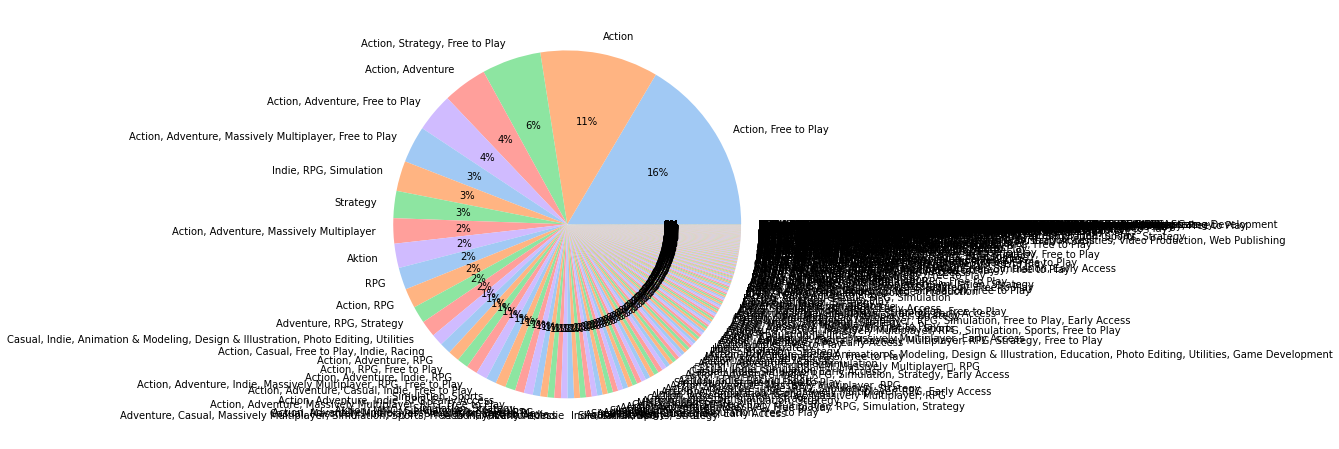

In [58]:
# sns.catplot(data=dat_genre_ranked, x="genero", y="descargas")
# Crear una figura y un eje
# Crear una figura
plt.figure(figsize=(10, 8))

# Datos para el gráfico de pastel
data = dat_genre_ranked['descargas']
labels = dat_genre_ranked['genero']

# Definir la paleta de colores a usar
colors = sns.color_palette('pastel')[0:5]

# Crear el gráfico de pastel
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')

# Mostrar el gráfico
plt.show()

In [23]:
# Crear una paleta de colores
palette = sns.color_palette('pastel', n_colors=len(dat_genre_ranked))

# Crear un dataframe con los géneros y los colores correspondientes
color_table = pd.DataFrame({
    'genero': dat_genre_ranked['genero'],
    'color': palette
})

# Convertir los colores a formato hexadecimal
color_table['color'] = color_table['color'].apply(lambda x: '#%02x%02x%02x' % (int(x[0]*255), int(x[1]*255), int(x[2]*255)))
print(color_table)

                                                genero    color
198                               Action, Free to Play  #a1c9f4
0                                               Action  #ffb482
304                     Action, Strategy, Free to Play  #8de5a1
1                                    Action, Adventure  #ff9f9b
55                     Action, Adventure, Free to Play  #d0bbff
..                                                 ...      ...
518        Indie, Massively Multiplayer, RPG, Strategy  #fab0e4
21   Action, Adventure, Casual, Indie, Massively Mu...  #cfcfcf
136  Action, Casual, Free to Play, Indie, Early Access  #fffea3
412  Casual, Free to Play, Indie, Racing, Simulatio...  #b9f2f0
546                            Indie, Sports, Strategy  #a1c9f4

[621 rows x 2 columns]


In [24]:
import matplotlib.patches as mpatches

c:\Users\s4nti\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\s4nti\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\s4nti\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12487 (\N{KATAKANA LETTER DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\s4nti\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12451 (\N{KATAKANA LETTER SMALL I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\s4nti\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: U

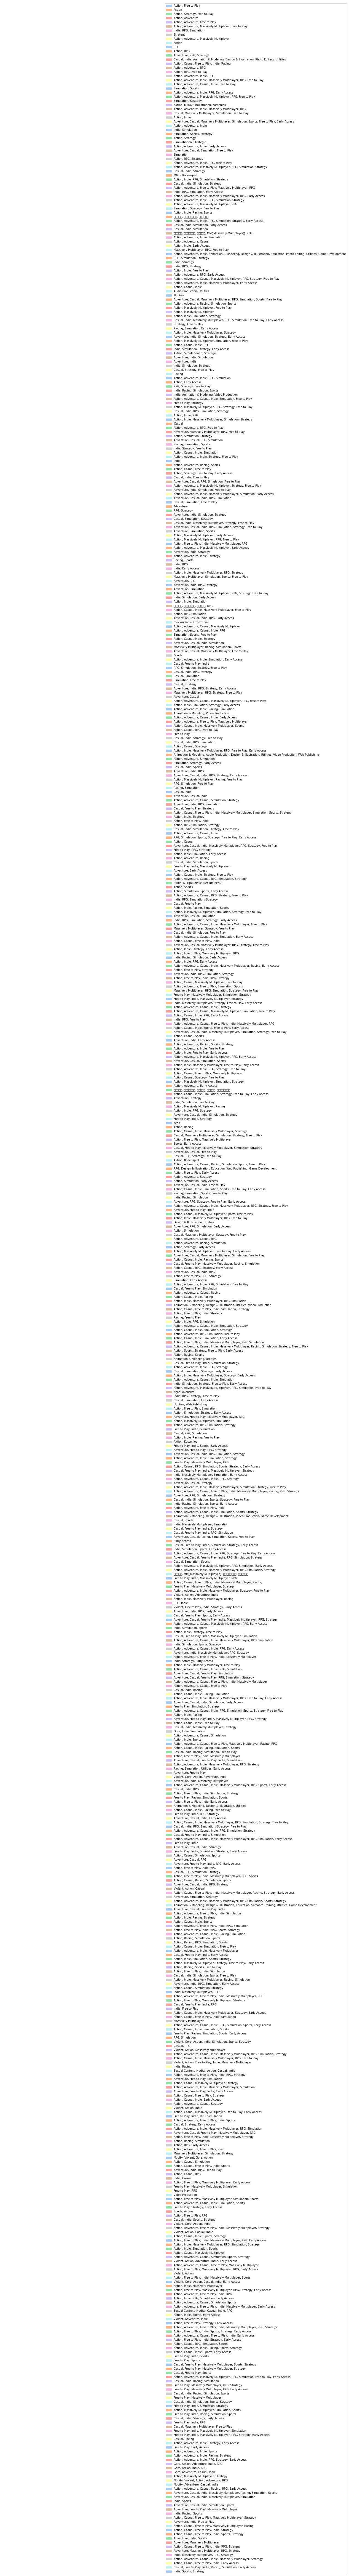

In [64]:
# Crear una figura
plt.figure(figsize=(10, 8))

# Crear una lista de parches de colores
patches = [mpatches.Patch(color=color, label=genre) for genre, color in zip(color_table['genero'], color_table['color'])]

# Crear una leyenda con los parches de colores
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left')

# Ocultar los ejes
plt.axis('off')

# Mostrar el gráfico
plt.show()

In [25]:
dat_genre_ranked

,genero,descargas,peso
198,"Action, Free to Play",817019.0,0.164913
0,Action,544247.0,0.109855
304,"Action, Strategy, Free to Play",272581.0,0.055020
1,"Action, Adventure",203731.0,0.041123
55,"Action, Adventure, Free to Play",177981.0,0.035925
...,...,...,...
518,"Indie, Massively Multiplayer, RPG, Strategy",0.0,0.000000
21,"Action, Adventure, Casual, Indie, Massively Mu...",0.0,0.000000
136,"Action, Casual, Free to Play, Indie, Early Access",0.0,0.000000
412,"Casual, Free to Play, Indie, Racing, Simulatio...",0.0,0.000000


In [26]:
dat_copy

,game_id,genero,descargas,tiempo_en_mercado,precio,multiplayer
0,461640,"Action, Adventure, Indie, RPG",1.0,2457,55.0,0.0
1,730,"Action, Free to Play",708661.0,2457,0.0,1.0
2,578080,"Action, Adventure, Massively Multiplayer, Free...",166412.0,2457,0.0,1.0
3,570,"Action, Strategy, Free to Play",272098.0,2457,0.0,1.0
5,235600,"Action, Adventure",34.0,2457,2999.0,1.0
...,...,...,...,...,...,...
4549,777130,"Casual, Indie, Simulation, Free to Play",503.0,1442,0.0,0.0
4550,784950,"Free to Play, Indie, Massively Multiplayer, St...",409.0,2211,0.0,1.0
4551,790600,"Free to Play, Indie, Strategy",15.0,2150,0.0,1.0
4552,793350,"Action, Casual, Indie",1.0,2214,299.0,0.0


In [27]:

# Unir los dos dataframes en base al género
dat_copy = dat_copy.merge(dat_genre_ranked, on='genero', how='left')



In [28]:
dat_copy

,game_id,genero,descargas_x,tiempo_en_mercado,precio,multiplayer,descargas_y,peso
0,461640,"Action, Adventure, Indie, RPG",1.0,2457,55.0,0.0,51545.0,0.010404
1,730,"Action, Free to Play",708661.0,2457,0.0,1.0,817019.0,0.164913
2,578080,"Action, Adventure, Massively Multiplayer, Free...",166412.0,2457,0.0,1.0,169584.0,0.034230
3,570,"Action, Strategy, Free to Play",272098.0,2457,0.0,1.0,272581.0,0.055020
4,235600,"Action, Adventure",34.0,2457,2999.0,1.0,203731.0,0.041123
...,...,...,...,...,...,...,...,...
4317,777130,"Casual, Indie, Simulation, Free to Play",503.0,1442,0.0,0.0,575.0,0.000116
4318,784950,"Free to Play, Indie, Massively Multiplayer, St...",409.0,2211,0.0,1.0,409.0,0.000083
4319,790600,"Free to Play, Indie, Strategy",15.0,2150,0.0,1.0,257.0,0.000052
4320,793350,"Action, Casual, Indie",1.0,2214,299.0,0.0,9806.0,0.001979


In [29]:
# Eliminar la columna 'descargas_y'
# dat_copy = dat_copy.drop(columns=['descargas_y'])

# Cambiar el nombre de la columna 'peso' a 'peso_en_mercado'
dat_copy = dat_copy.rename(columns={'peso': 'genero_peso_en_mercado'})

In [30]:
dat_copy

,game_id,genero,descargas_x,tiempo_en_mercado,precio,multiplayer,descargas_y,genero_peso_en_mercado
0,461640,"Action, Adventure, Indie, RPG",1.0,2457,55.0,0.0,51545.0,0.010404
1,730,"Action, Free to Play",708661.0,2457,0.0,1.0,817019.0,0.164913
2,578080,"Action, Adventure, Massively Multiplayer, Free...",166412.0,2457,0.0,1.0,169584.0,0.034230
3,570,"Action, Strategy, Free to Play",272098.0,2457,0.0,1.0,272581.0,0.055020
4,235600,"Action, Adventure",34.0,2457,2999.0,1.0,203731.0,0.041123
...,...,...,...,...,...,...,...,...
4317,777130,"Casual, Indie, Simulation, Free to Play",503.0,1442,0.0,0.0,575.0,0.000116
4318,784950,"Free to Play, Indie, Massively Multiplayer, St...",409.0,2211,0.0,1.0,409.0,0.000083
4319,790600,"Free to Play, Indie, Strategy",15.0,2150,0.0,1.0,257.0,0.000052
4320,793350,"Action, Casual, Indie",1.0,2214,299.0,0.0,9806.0,0.001979


In [31]:
from sklearn.linear_model import LinearRegression


In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [34]:
dat_downloads = dat_copy['descargas_x']
dat_downloads

0            1.0
1       708661.0
2       166412.0
3       272098.0
4           34.0
          ...   
4317       503.0
4318       409.0
4319        15.0
4320         1.0
4321         0.0
Name: descargas_x, Length: 4322, dtype: float64

In [35]:
scl_dat_downloads = scaler.fit(dat_downloads.values.reshape(-1, 1))
print(scl_dat_downloads)


StandardScaler()


In [36]:
dat_downloads_transformed = scaler.transform(dat_downloads.values.reshape(-1, 1))
print(dat_downloads_transformed)


[[-0.08563943]
 [52.90503092]
 [12.35788842]
 ...
 [-0.08459257]
 [-0.08563943]
 [-0.08571421]]


In [37]:
dat_tiempo_mercado = dat_copy['tiempo_en_mercado']
dat_tiempo_mercado

0       2457
1       2457
2       2457
3       2457
4       2457
        ... 
4317    1442
4318    2211
4319    2150
4320    2214
4321    2209
Name: tiempo_en_mercado, Length: 4322, dtype: int64

In [38]:
scl_dat_tiempo = scaler.fit(dat_tiempo_mercado.values.reshape(-1, 1))
print(scl_dat_tiempo)


StandardScaler()


In [39]:
scl_dat_tiempo_transformed = scaler.transform(dat_tiempo_mercado.values.reshape(-1, 1))
print(scl_dat_tiempo_transformed)

[[-0.15745883]
 [-0.15745883]
 [-0.15745883]
 ...
 [-0.37111272]
 [-0.32657249]
 [-0.3300522 ]]


In [40]:
dat_precio = dat_copy['descargas_x']
dat_precio

0            1.0
1       708661.0
2       166412.0
3       272098.0
4           34.0
          ...   
4317       503.0
4318       409.0
4319        15.0
4320         1.0
4321         0.0
Name: descargas_x, Length: 4322, dtype: float64

In [41]:
scl_dat_precio = scaler.fit(dat_precio.values.reshape(-1, 1))
print(scl_dat_precio)

StandardScaler()


In [42]:
scl_dat_precio_transformed = scaler.transform(dat_precio.values.reshape(-1, 1))
print(scl_dat_precio_transformed)

[[-0.08563943]
 [52.90503092]
 [12.35788842]
 ...
 [-0.08459257]
 [-0.08563943]
 [-0.08571421]]


In [43]:
dat_peso_genero_en_mercado = dat_copy['genero_peso_en_mercado']
dat_peso_genero_en_mercado

0       0.010404
1       0.164913
2       0.034230
3       0.055020
4       0.041123
          ...   
4317    0.000116
4318    0.000083
4319    0.000052
4320    0.001979
4321    0.000001
Name: genero_peso_en_mercado, Length: 4322, dtype: float64

In [44]:
scl_dat_peso_genero = scaler.fit(dat_peso_genero_en_mercado.values.reshape(-1, 1))
print(scl_dat_peso_genero)

StandardScaler()


In [45]:
scl_dat_peso_genero_transformed = scaler.transform(dat_peso_genero_en_mercado.values.reshape(-1, 1))
print(scl_dat_peso_genero_transformed)

[[-0.17561172]
 [ 4.35071043]
 [ 0.52236435]
 ...
 [-0.47888265]
 [-0.42241849]
 [-0.48037275]]


In [46]:
d = {
    'descargas': dat_downloads_transformed.flatten(),
    'tiempo_en_mercado': scl_dat_tiempo_transformed.flatten(),
    'peso_de_categoria': scl_dat_peso_genero_transformed.flatten(),
    'precio': scl_dat_precio_transformed.flatten()
}
dat_for_test = pd.DataFrame(data=d)

In [47]:
dat_for_test

,descargas,tiempo_en_mercado,peso_de_categoria,precio
0,-0.085639,-0.157459,-0.175612,-0.085639
1,52.905031,-0.157459,4.350710,52.905031
2,12.357888,-0.157459,0.522364,12.357888
3,20.260651,-0.157459,1.131396,20.260651
4,-0.083172,-0.157459,0.724279,-0.083172
...,...,...,...,...
4317,-0.048102,-0.863839,-0.477002,-0.048102
4318,-0.055131,-0.328660,-0.477984,-0.055131
4319,-0.084593,-0.371113,-0.478883,-0.084593
4320,-0.085639,-0.326572,-0.422418,-0.085639


In [48]:
# Variables de entrada
x = dat_for_test[['precio', 'tiempo_en_mercado', 'peso_de_categoria']]
x.head()

,precio,tiempo_en_mercado,peso_de_categoria
0,-0.085639,-0.157459,-0.175612
1,52.905031,-0.157459,4.350710
2,12.357888,-0.157459,0.522364
3,20.260651,-0.157459,1.131396
4,-0.083172,-0.157459,0.724279


In [47]:
y = dat_for_test['descargas']
y

0       -0.085639
1       52.905031
2       12.357888
3       20.260651
4       -0.083172
          ...    
4317    -0.048102
4318    -0.055131
4319    -0.084593
4320    -0.085639
4321    -0.085714
Name: descargas, Length: 4322, dtype: float64

In [48]:
lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

In [49]:
lr.intercept_

-2.391681723640504e-32

In [50]:
lr.coef_

array([ 1.00000000e+00, -6.95160449e-17,  1.75633518e-16])

In [51]:
pars = pd.DataFrame({
    'Coef':[lr.intercept_]+list(lr.coef_)
})
pars.index = ['Intersección']+list(x.columns)
pars

,Coef
Intersección,-2.391682e-32
precio,1.000000e+00
tiempo_en_mercado,-6.951604e-17
peso_de_categoria,1.756335e-16


In [52]:
lr.score(x,y)

1.0

In [53]:
yp = lr.predict(x)
resume = pd.DataFrame({'y':y,'yp':yp})
resume

,y,yp
0,-0.085639,-0.085639
1,52.905031,52.905031
2,12.357888,12.357888
3,20.260651,20.260651
4,-0.083172,-0.083172
...,...,...
4317,-0.048102,-0.048102
4318,-0.055131,-0.055131
4319,-0.084593,-0.084593
4320,-0.085639,-0.085639


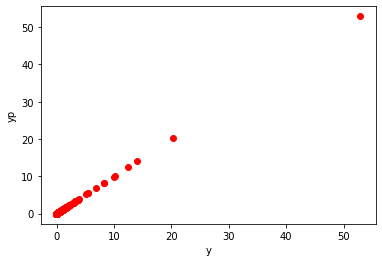

In [54]:
plt.plot(resume['y'],resume['yp'],'ro')
plt.xlabel('y')
plt.ylabel('yp')
plt.show()

In [54]:
from sklearn.metrics import r2_score

# r2_1 = r2_score(y,yp)
# r2_1

In [56]:
resume = pd.DataFrame({
    'y':y,
    'yp':yp,
    'e':y-yp,
    'e^2':(y-yp)**2
})

resume.head()

,y,yp,e,e^2
0,-0.085639,-0.085639,6.800116e-16,4.624158e-31
1,52.905031,52.905031,-4.121148e-13,1.698386e-25
2,12.357888,12.357888,-9.592327e-14,9.201274e-27
3,20.260651,20.260651,-1.563194e-13,2.443576e-26
4,-0.083172,-0.083172,5.134781e-16,2.636598e-31


In [57]:
resume['e^2'].mean()

6.049264410795584e-29

In [58]:
from sklearn.metrics import mean_squared_error
rms_1 = mean_squared_error(y,yp)
rms_1

6.049264410795584e-29

In [59]:
x2 = x.drop('peso_de_categoria',axis=1)
x2.head()

,precio,tiempo_en_mercado
0,-0.085639,-0.157459
1,52.905031,-0.157459
2,12.357888,-0.157459
3,20.260651,-0.157459
4,-0.083172,-0.157459


In [60]:
lr2 = LinearRegression().fit(x2,y)


In [61]:
pars = pd.DataFrame({
    'Coef':[lr2.intercept_]+list(lr2.coef_)
})
pars.index = ['Intersección']+list(x2.columns)
pars

,Coef
Intersección,4.288311e-33
precio,1.000000e+00
tiempo_en_mercado,2.964136e-17


In [62]:
yp2 = lr2.predict(x2)

r2_2 = r2_score(y,yp2)
rms_2 = mean_squared_error(y,yp2)

print('R2 = '+str(r2_2))
print('RMS = ' + str(rms_2))

R2 = 1.0
RMS = 5.433982349729795e-29


In [63]:
x3 = x2.drop('tiempo_en_mercado',axis=1)
x3.head()

,precio
0,-0.085639
1,52.905031
2,12.357888
3,20.260651
4,-0.083172


In [64]:
x4 = x2.drop('precio',axis = 1)
x4.head()

,tiempo_en_mercado
0,-0.157459
1,-0.157459
2,-0.157459
3,-0.157459
4,-0.157459


In [65]:
lr3 = LinearRegression().fit(x3,y)
lr4 = LinearRegression().fit(x4,y)

In [66]:
yp3 = lr3.predict(x3)

r2_3 = r2_score(y,yp3)
rms_3 = mean_squared_error(y,yp3)

print('R2 3er modelo solo tiempo en el mercado = '+str(r2_3))
print('RMS 3er modelo solo tiempo en el mercado= ' + str(rms_3))

yp4 = lr4.predict(x4)

r2_4 = r2_score(y,yp4)
rms_4 = mean_squared_error(y,yp4)

print('R2 4to modelo solo precio = '+str(r2_4))
print('RMS 4to modelo solo precio = ' + str(rms_4))

R2 3er modelo solo tiempo en el mercado = 1.0
RMS 3er modelo solo tiempo en el mercado= 5.071051817417319e-29
R2 4to modelo solo precio = 0.0014035443165775208
RMS 4to modelo solo precio = 0.9985964556834227


In [69]:
x5  = dat_for_test[['peso_de_categoria']]
x5

,peso_de_categoria
0,-0.175612
1,4.350710
2,0.522364
3,1.131396
4,0.724279
...,...
4317,-0.477002
4318,-0.477984
4319,-0.478883
4320,-0.422418


In [71]:
lr5 = LinearRegression().fit(x5,y)
yp5 = lr5.predict(x5)

r2_5 = r2_score(y,yp5)
rms_5 = mean_squared_error(y,yp5)

print('R2 4to modelo solo peso de categoría = '+str(r2_5))
print('RMS 4to modelo solo peso de categoría = ' + str(rms_5))

R2 4to modelo solo peso de categoría = 0.008066873572431077
RMS 4to modelo solo peso de categoría = 0.991933126427569


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve

In [59]:




# Inicializar los modelos
# log_reg = LogisticRegression()
# decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svm = SVC()

# Entrenar los modelos
# log_reg.fit(X_train, y_train)
# decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Realizar predicciones
# y_pred_log_reg = log_reg.predict(X_test)
# y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)
y_pred_svm = svm.predict(X_test)

# Evaluar el desempeño de los modelos
# accuracy_log_reg = r2_score(y_test, y_pred_log_reg)
# accuracy_decision_tree = r2_score(y_test, y_pred_decision_tree)
accuracy_random_forest = r2_score(y_test, y_pred_random_forest)
accuracy_svm = r2_score(y_test, y_pred_svm)

# Imprimir los resultados
# print("Logistic Regression: Accuracy =", accuracy_log_reg)
# mse = mean_squared_error(y_test, y_pred_log_reg)
# print("Error cuadrático medio (MSE):", mse)

# print("Decision Tree: Accuracy =", accuracy_decision_tree)
# mse = mean_squared_error(y_test, y_pred_decision_tree)
# print("Error cuadrático medio (MSE):", mse)

print("Random Forest: Accuracy =", accuracy_random_forest)
mse = mean_squared_error(y_test, y_pred_random_forest)
print("Error cuadrático medio (MSE):", mse)

print("SVM: Accuracy =", accuracy_svm)
mse = mean_squared_error(y_test, y_pred_svm)
print("Error cuadrático medio (MSE):", mse)

ValueError: Unknown label type: 'continuous'

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [69]:

# Seleccionar las características (variables independientes) y la etiqueta (variable dependiente)
X = pd.DataFrame(dat_for_test['tiempo_en_mercado'])
y = dat_for_test['descargas'] 


# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar los modelos
lin_reg = LinearRegression()
decision_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor()
svm = SVR()

# Entrenar los modelos
lin_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Realizar predicciones
y_pred_lin_reg = lin_reg.predict(X_test)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)
y_pred_svm = svm.predict(X_test)

# Evaluar el desempeño de los modelos
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)
r2_random_forest = r2_score(y_test, y_pred_random_forest)
r2_svm = r2_score(y_test, y_pred_svm)

# Imprimir los resultados
print("Linear Regression: R2 =", r2_lin_reg)
print("Decision Tree: R2 =", r2_decision_tree)
print("Random Forest: R2 =", r2_random_forest)
print("SVM: R2 =", r2_svm)

Linear Regression: R2 = -0.00632532590686985
Decision Tree: R2 = -4.552518474279075
Random Forest: R2 = -2.044816660058759
SVM: R2 = -0.03163566503046966


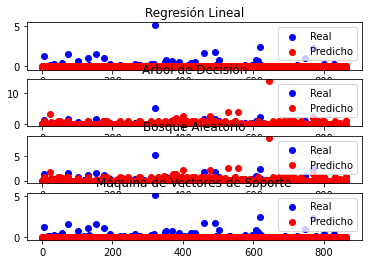

In [70]:
# Importar las bibliotecas necesarias
import matplotlib.pyplot as plt

# Crear una figura y un conjunto de subtramas
fig, axs = plt.subplots(4)

# Crear un rango de valores para el eje x
x_range = range(len(y_test))

# Graficar los resultados reales vs. las predicciones para cada modelo
axs[0].scatter(x_range, y_test, color='blue', label='Real')
axs[0].scatter(x_range, y_pred_lin_reg, color='red', label='Predicho')
axs[0].set_title('Regresión Lineal')

axs[1].scatter(x_range, y_test, color='blue', label='Real')
axs[1].scatter(x_range, y_pred_decision_tree, color='red', label='Predicho')
axs[1].set_title('Árbol de Decisión')

axs[2].scatter(x_range, y_test, color='blue', label='Real')
axs[2].scatter(x_range, y_pred_random_forest, color='red', label='Predicho')
axs[2].set_title('Bosque Aleatorio')

axs[3].scatter(x_range, y_test, color='blue', label='Real')
axs[3].scatter(x_range, y_pred_svm, color='red', label='Predicho')
axs[3].set_title('Máquina de Vectores de Soporte')

# Añadir una leyenda a cada subtrama
for ax in axs:
    ax.legend()

# Mostrar la figura
plt.show()


In [71]:

# Seleccionar las características (variables independientes) y la etiqueta (variable dependiente)
X = dat_for_test[['tiempo_en_mercado', 'precio']]
y = dat_for_test['descargas'] 


# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar los modelos
lin_reg = LinearRegression()
decision_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor()
svm = SVR()

# Entrenar los modelos
lin_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Realizar predicciones
y_pred_lin_reg = lin_reg.predict(X_test)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)
y_pred_svm = svm.predict(X_test)

# Evaluar el desempeño de los modelos
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)
r2_random_forest = r2_score(y_test, y_pred_random_forest)
r2_svm = r2_score(y_test, y_pred_svm)

# Imprimir los resultados
print("Linear Regression: R2 =", r2_lin_reg)
print("Decision Tree: R2 =", r2_decision_tree)
print("Random Forest: R2 =", r2_random_forest)
print("SVM: R2 =", r2_svm)

Linear Regression: R2 = 1.0
Decision Tree: R2 = 0.951766691387127
Random Forest: R2 = 0.9925869288900604
SVM: R2 = 0.8853228243299665


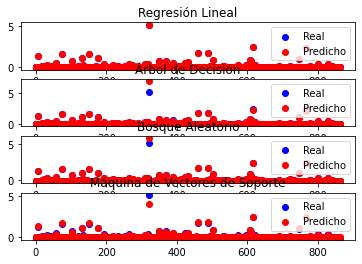

In [72]:
# Importar las bibliotecas necesarias
import matplotlib.pyplot as plt

# Crear una figura y un conjunto de subtramas
fig, axs = plt.subplots(4)

# Crear un rango de valores para el eje x
x_range = range(len(y_test))

# Graficar los resultados reales vs. las predicciones para cada modelo
axs[0].scatter(x_range, y_test, color='blue', label='Real')
axs[0].scatter(x_range, y_pred_lin_reg, color='red', label='Predicho')
axs[0].set_title('Regresión Lineal')

axs[1].scatter(x_range, y_test, color='blue', label='Real')
axs[1].scatter(x_range, y_pred_decision_tree, color='red', label='Predicho')
axs[1].set_title('Árbol de Decisión')

axs[2].scatter(x_range, y_test, color='blue', label='Real')
axs[2].scatter(x_range, y_pred_random_forest, color='red', label='Predicho')
axs[2].set_title('Bosque Aleatorio')

axs[3].scatter(x_range, y_test, color='blue', label='Real')
axs[3].scatter(x_range, y_pred_svm, color='red', label='Predicho')
axs[3].set_title('Máquina de Vectores de Soporte')

# Añadir una leyenda a cada subtrama
for ax in axs:
    ax.legend()

# Mostrar la figura
plt.show()


In [73]:

# Seleccionar las características (variables independientes) y la etiqueta (variable dependiente)
X = dat_for_test[['peso_de_categoria', 'precio']]
y = dat_for_test['descargas'] 


# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar los modelos
lin_reg = LinearRegression()
decision_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor()
svm = SVR()

# Entrenar los modelos
lin_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Realizar predicciones
y_pred_lin_reg = lin_reg.predict(X_test)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)
y_pred_svm = svm.predict(X_test)

# Evaluar el desempeño de los modelos
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)
r2_random_forest = r2_score(y_test, y_pred_random_forest)
r2_svm = r2_score(y_test, y_pred_svm)

# Imprimir los resultados
print("Linear Regression: R2 =", r2_lin_reg)
print("Decision Tree: R2 =", r2_decision_tree)
print("Random Forest: R2 =", r2_random_forest)
print("SVM: R2 =", r2_svm)

Linear Regression: R2 = 1.0
Decision Tree: R2 = 0.9979618654312514
Random Forest: R2 = 0.9979458724433455
SVM: R2 = 0.9203186910919875


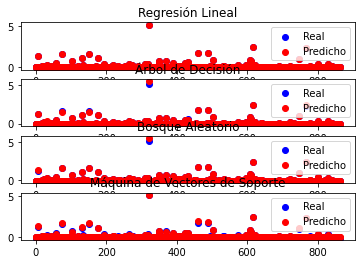

In [74]:
# Importar las bibliotecas necesarias
import matplotlib.pyplot as plt

# Crear una figura y un conjunto de subtramas
fig, axs = plt.subplots(4)

# Crear un rango de valores para el eje x
x_range = range(len(y_test))

# Graficar los resultados reales vs. las predicciones para cada modelo
axs[0].scatter(x_range, y_test, color='blue', label='Real')
axs[0].scatter(x_range, y_pred_lin_reg, color='red', label='Predicho')
axs[0].set_title('Regresión Lineal')

axs[1].scatter(x_range, y_test, color='blue', label='Real')
axs[1].scatter(x_range, y_pred_decision_tree, color='red', label='Predicho')
axs[1].set_title('Árbol de Decisión')

axs[2].scatter(x_range, y_test, color='blue', label='Real')
axs[2].scatter(x_range, y_pred_random_forest, color='red', label='Predicho')
axs[2].set_title('Bosque Aleatorio')

axs[3].scatter(x_range, y_test, color='blue', label='Real')
axs[3].scatter(x_range, y_pred_svm, color='red', label='Predicho')
axs[3].set_title('Máquina de Vectores de Soporte')

# Añadir una leyenda a cada subtrama
for ax in axs:
    ax.legend()

# Mostrar la figura
plt.show()


In [77]:

# Seleccionar las características (variables independientes) y la etiqueta (variable dependiente)
X = dat_for_test[['peso_de_categoria']]
y = dat_for_test['descargas'] 


# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar los modelos
lin_reg = LinearRegression()
decision_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor()
svm = SVR()

# Entrenar los modelos
lin_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Realizar predicciones
y_pred_lin_reg = lin_reg.predict(X_test)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)
y_pred_svm = svm.predict(X_test)

# Evaluar el desempeño de los modelos
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)
r2_random_forest = r2_score(y_test, y_pred_random_forest)
r2_svm = r2_score(y_test, y_pred_svm)

# Imprimir los resultados
print("Linear Regression: R2 =", r2_lin_reg)
print("Decision Tree: R2 =", r2_decision_tree)
print("Random Forest: R2 =", r2_random_forest)
print("SVM: R2 =", r2_svm)

Linear Regression: R2 = -0.18775661082883555
Decision Tree: R2 = -3.0548310602634947
Random Forest: R2 = -1.503715648022947
SVM: R2 = -0.0325957086714197


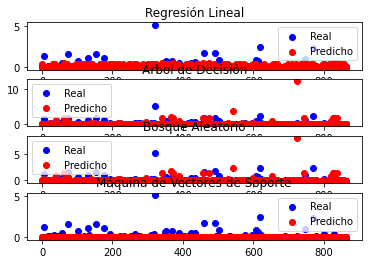

In [78]:
# Importar las bibliotecas necesarias
import matplotlib.pyplot as plt

# Crear una figura y un conjunto de subtramas
fig, axs = plt.subplots(4)

# Crear un rango de valores para el eje x
x_range = range(len(y_test))

# Graficar los resultados reales vs. las predicciones para cada modelo
axs[0].scatter(x_range, y_test, color='blue', label='Real')
axs[0].scatter(x_range, y_pred_lin_reg, color='red', label='Predicho')
axs[0].set_title('Regresión Lineal')

axs[1].scatter(x_range, y_test, color='blue', label='Real')
axs[1].scatter(x_range, y_pred_decision_tree, color='red', label='Predicho')
axs[1].set_title('Árbol de Decisión')

axs[2].scatter(x_range, y_test, color='blue', label='Real')
axs[2].scatter(x_range, y_pred_random_forest, color='red', label='Predicho')
axs[2].set_title('Bosque Aleatorio')

axs[3].scatter(x_range, y_test, color='blue', label='Real')
axs[3].scatter(x_range, y_pred_svm, color='red', label='Predicho')
axs[3].set_title('Máquina de Vectores de Soporte')

# Añadir una leyenda a cada subtrama
for ax in axs:
    ax.legend()

# Mostrar la figura
plt.show()


In [75]:

# Seleccionar las características (variables independientes) y la etiqueta (variable dependiente)
X = dat_for_test[['peso_de_categoria', 'tiempo_en_mercado']]
y = dat_for_test['descargas'] 


# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar los modelos
lin_reg = LinearRegression()
decision_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor()
svm = SVR()

# Entrenar los modelos
lin_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Realizar predicciones
y_pred_lin_reg = lin_reg.predict(X_test)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)
y_pred_svm = svm.predict(X_test)

# Evaluar el desempeño de los modelos
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)
r2_random_forest = r2_score(y_test, y_pred_random_forest)
r2_svm = r2_score(y_test, y_pred_svm)

# Imprimir los resultados
print("Linear Regression: R2 =", r2_lin_reg)
print("Decision Tree: R2 =", r2_decision_tree)
print("Random Forest: R2 =", r2_random_forest)
print("SVM: R2 =", r2_svm)

Linear Regression: R2 = -0.17313753910597618
Decision Tree: R2 = -10.29714172415283
Random Forest: R2 = -7.873735532532843
SVM: R2 = -0.030489043626323653


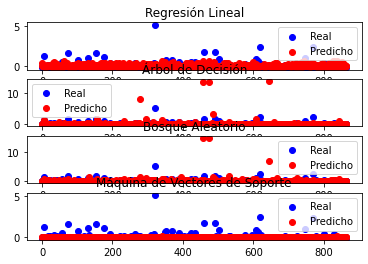

In [76]:
# Importar las bibliotecas necesarias
import matplotlib.pyplot as plt

# Crear una figura y un conjunto de subtramas
fig, axs = plt.subplots(4)

# Crear un rango de valores para el eje x
x_range = range(len(y_test))

# Graficar los resultados reales vs. las predicciones para cada modelo
axs[0].scatter(x_range, y_test, color='blue', label='Real')
axs[0].scatter(x_range, y_pred_lin_reg, color='red', label='Predicho')
axs[0].set_title('Regresión Lineal')

axs[1].scatter(x_range, y_test, color='blue', label='Real')
axs[1].scatter(x_range, y_pred_decision_tree, color='red', label='Predicho')
axs[1].set_title('Árbol de Decisión')

axs[2].scatter(x_range, y_test, color='blue', label='Real')
axs[2].scatter(x_range, y_pred_random_forest, color='red', label='Predicho')
axs[2].set_title('Bosque Aleatorio')

axs[3].scatter(x_range, y_test, color='blue', label='Real')
axs[3].scatter(x_range, y_pred_svm, color='red', label='Predicho')
axs[3].set_title('Máquina de Vectores de Soporte')

# Añadir una leyenda a cada subtrama
for ax in axs:
    ax.legend()

# Mostrar la figura
plt.show()


In [52]:
from sklearn.metrics import mean_squared_error

# y_true son los valores reales y y_pred son las predicciones del modelo
# mse = mean_squared_error(y_test, y_pred)

# print("Error cuadrático medio (MSE):", mse)

In [90]:
# ======= Modelo de todas las variables =======

# Variables independientes
X = dat_for_test[['precio', 'tiempo_en_mercado', 'peso_de_categoria']]
# Varaible dependiente
y = dat_for_test['descargas']

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo a utilizar
lr = LinearRegression()

# Entrenar los modelos
lr.fit(X_train, y_train)

# Realizar predicciones
y_pred_lr = lr.predict(X_test)

# Evaluar el desempeño de los modelos
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)


# Imprimir los resultados
print("Linear Regression: Accuracy =", r2)
print("Error cuadrático medio (MSE):", mse)


Linear Regression: Accuracy = 1.0
Error cuadrático medio (MSE): 3.0807622291355367e-30


In [91]:
# ======= Modelo sin contemplar género =======

# Variables independientes
X = dat_for_test[['precio', 'tiempo_en_mercado']]
# Varaible dependiente
y = dat_for_test['descargas']

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo a utilizar
lr = LinearRegression()

# Entrenar los modelos
lr.fit(X_train, y_train)

# Realizar predicciones
y_pred_lr = lr.predict(X_test)

# Evaluar el desempeño de los modelos
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)


# Imprimir los resultados
print("Linear Regression: Accuracy =", r2)
print("Error cuadrático medio (MSE):", mse)


Linear Regression: Accuracy = 1.0
Error cuadrático medio (MSE): 2.799667124659704e-30


In [93]:
# ======= Modelo contemplando solo género =======

# Variables independientes
X = dat_for_test[['peso_de_categoria']]
# Varaible dependiente
y = dat_for_test['descargas']

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo a utilizar
lr = LinearRegression()

# Entrenar los modelos
lr.fit(X_train, y_train)

# Realizar predicciones
y_pred_lr = lr.predict(X_test)

# Evaluar el desempeño de los modelos
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)


# Imprimir los resultados
print("Linear Regression: Accuracy =", r2)
print("Error cuadrático medio (MSE):", mse)


Linear Regression: Accuracy = -0.18775661082883555
Error cuadrático medio (MSE): 0.08835434657378813


In [94]:
# ======= Modelo sin contemplar tiempo en el mercado =======

# Variables independientes
X = dat_for_test[['precio', 'peso_de_categoria']]
# Varaible dependiente
y = dat_for_test['descargas']

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo a utilizar
lr = LinearRegression()

# Entrenar los modelos
lr.fit(X_train, y_train)

# Realizar predicciones
y_pred_lr = lr.predict(X_test)

# Evaluar el desempeño de los modelos
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)


# Imprimir los resultados
print("Linear Regression: Accuracy =", r2)
print("Error cuadrático medio (MSE):", mse)


Linear Regression: Accuracy = 1.0
Error cuadrático medio (MSE): 2.3840427453073373e-30


In [95]:
# ======= Modelo sin contemplar precio =======

# Variables independientes
X = dat_for_test[['tiempo_en_mercado', 'peso_de_categoria']]
# Varaible dependiente
y = dat_for_test['descargas']

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo a utilizar
lr = LinearRegression()

# Entrenar los modelos
lr.fit(X_train, y_train)

# Realizar predicciones
y_pred_lr = lr.predict(X_test)

# Evaluar el desempeño de los modelos
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)


# Imprimir los resultados
print("Linear Regression: Accuracy =", r2)
print("Error cuadrático medio (MSE):", mse)

Linear Regression: Accuracy = -0.17313753910597685
Error cuadrático medio (MSE): 0.08726686912444168


In [55]:
# ======= Modelo contemplando solo el tiempo en el mercado =======

# Variables independientes
X = dat_for_test[['tiempo_en_mercado']]
# Varaible dependiente
y = dat_for_test['descargas']

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo a utilizar
lr = LinearRegression()

# Entrenar los modelos
lr.fit(X_train, y_train)

# Realizar predicciones
y_pred_lr = lr.predict(X_test)

# Evaluar el desempeño de los modelos
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)


# Imprimir los resultados
print("Linear Regression: Accuracy =", r2)
print("Error cuadrático medio (MSE):", mse)

Linear Regression: Accuracy = -0.00632532590686985
Error cuadrático medio (MSE): 0.07485811133403063
